In [1]:
#importamos libreria
import numpy as np
import pandas as pd

#importamos librerias de visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Ruta al archivo CSV en la carpeta data
file_path = '../data/online_course_engagement_data.csv'

# Leer el archivo CSV
df = pd.read_csv(file_path)

`Limpieza de Datos`

*Verificamos valores Nulos.*

In [5]:
#Verificar datos faltantes
df.isna().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

*Identificamos Duplicados*

In [8]:
# Verificar datos duplicados
duplicados = df.duplicated().sum()

# Porcenatje de data duplicada
porcentaje = df.duplicated().sum() / df.shape[0] * 100

print(f'{duplicados} el numero de filas duplicadas representa {porcentaje.round(2)}% del total de la data.')

877 el numero de filas duplicadas representa 9.74% del total de la data.


In [10]:
# Inspeccione algunas filas que contienen duplicados
df[df.duplicated()].head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
351,7812,Programming,76.319366,0,9,67.509219,9.355098,1,0
383,17,Science,60.902054,4,10,82.143128,48.550331,1,0
444,4293,Health,4.179856,15,6,64.887538,20.909773,1,0
456,8734,Science,93.461459,6,7,78.610963,2.316283,0,0
503,5995,Business,19.671294,2,4,95.233215,37.351241,1,0
...,...,...,...,...,...,...,...,...,...
2854,8064,Business,38.203695,2,2,55.509119,23.929269,1,0
2856,2456,Health,5.710736,18,2,75.203942,28.326634,0,0
2870,1530,Business,32.974895,15,2,65.108207,69.392668,1,0
2925,7564,Health,7.135529,11,9,76.041245,53.867051,0,0


*Borramos duplicados*

In [11]:
# Borramos datos duplicados y creamos un nuevo df1
df1 = df.drop_duplicates(keep='first')

# Mostramos las primeras filas del df1
df1.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


*Verificamos Outliers*

In [12]:
# Estadistica general del df1
df1.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,4504.687185,50.607728,10.148098,5.166933,75.091084,51.190873,0.500431,0.439247
std,2604.220672,28.364184,5.987972,3.132108,14.339876,29.069716,0.500031,0.496326
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2248.500000,26.114631,5.000000,2.000000,62.791226,26.276765,0.000000,0.000000
50%,4492.000000,50.316921,10.000000,5.000000,75.273913,51.581186,1.000000,0.000000
75%,6766.500000,75.377730,15.000000,8.000000,87.497542,76.729629,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [24]:
pip install scikit-learn


^C
Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.8 kB 890.4 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 647.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 30.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 44.5 MB/s eta 0:00:01
   ------------------- -------------------- 5.4/11.0 MB 43.3 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.0 MB 44.4 MB/s eta 0:00:01
   ----------------------------------- ---- 9.6/11.0 MB 47.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 50.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 43.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ---

*Verificamos Outliers*: *Boxplots*

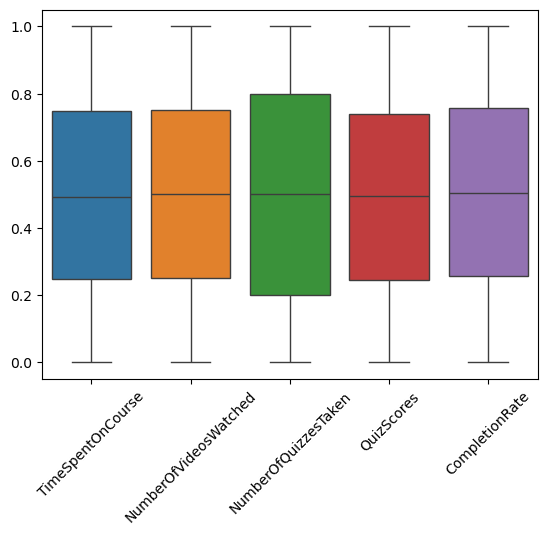

In [28]:
# diagrama de caja para visualizar la distribución de todas las variables numéricas

# normalizar la escala
from sklearn.preprocessing import MinMaxScaler

# seleccionar columnas numéricas
num_columns = df[['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate']]

#normalize values using min-max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Create df with normalized data
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)

sns.boxplot(data= df_normalized)
plt.xticks(rotation=45)

plt.show()

*No se osbervan Outliers*